# Lending Club Loan Analysis

# Company Information
<b>Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers.</b>

# Dataset
<b> The dataset is downloaded from Kaggle </b>
<b><br> Data contains 2 csv files: <b></br>
<b><br> 1st csv file contains data about 2007-2015 loans issued by Lending Club </b></br>
<b><br> 2nd csv file contains data about 2016-2017 loans issued by Lending Club </b></br>

# Task Performed
<b><br>1: Loaded both the datasets and combine them into single dataset </b></br>
<b><br>2: Performed Data Cleaning and analysis in PySpark </b></br>
<b><br>3: Performed Spark Transformations and Actions & Exploratory Data Analysis to find insights and analyze data by plotting graphs and analysis </b></br>
<b><br>4: Exploring major reasons for Loan Taken by borrowers, Yearly Loan taken </br></b>
<br><b>5: Inspecting statewise loans taken and why some loans are taken more in some states</br></b>
<br><b>6: Analyzing by Income category, Home Ownership relation Loan Status </b></br>
<b><br>7: Inspecting terms period for loan taken and finding States with High Percentage of Good Loans and States with High Percenatge Bad Loans by relation with Debt to Income ratio (dti)</br></b>
<b><br>8: Tracking Interest Rate for Loan taken with respect to Loan Status and Installments for different reasons for loan taken with respect to Loan Status </br></b>

In [ ]:
# Installing PySpark
!pip install pyspark

In [1]:
import pyspark
from pyspark.sql import SparkSession


In [2]:
# Creating a Spark Session
spark=SparkSession.builder.appName('LendingClub').getOrCreate()

In [3]:
# Details about Spark Session created
spark

In [4]:
# Read a dataset
df_spark=spark.read.csv("C:/Users/shwer/OneDrive/Desktop/Lending Club/lc_loan.csv") # Contains data from 2007 -2015
df_spark1=spark.read.csv("C:/Users/shwer/OneDrive/Desktop/Lending Club/lc_2016_2017.csv") # Contains data from 2016-2017

In [5]:
# Reading a dataset with header as first row i.e. column names
a=spark.read.option('header','true').csv('C:/Users/shwer/OneDrive/Desktop/Lending Club/lc_loan.csv')
b=spark.read.option('header','true').csv('C:/Users/shwer/OneDrive/Desktop/Lending Club/lc_2016_2017.csv')

In [6]:
# Checking the type
print(type(a))
type(b)


<class 'pyspark.sql.dataframe.DataFrame'>


pyspark.sql.dataframe.DataFrame

In [7]:
# Getting total number of rows in dataframe
print(a.count())
b.count()

887379


759338

In [8]:
# Printing the Schema
a.printSchema()

root
 |-- id: string (nullable = true)
 |-- member_id: string (nullable = true)
 |-- loan_amnt: string (nullable = true)
 |-- funded_amnt: string (nullable = true)
 |-- funded_amnt_inv: string (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: string (nullable = true)
 |-- installment: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- earliest_cr_line: string (nullable = true)
 |-- inq_last_6mths: string (nullable = 

In [9]:
# dti_joint= Debt/Income ratio is important feature to see whether the borrower has ability to really pay. If debt is close to income then by default then customer will always have its personal needs and then it will be a problem

In [10]:
# As there are 145 columns so selecting only few subset of columns from the data
sel1=a.select("term","home_ownership","grade","purpose","int_rate","addr_state","loan_status","application_type","loan_amnt","emp_length","annual_inc","dti","delinq_2yrs","revol_util","total_acc","dti_joint","installment","issue_d")
sel2=b.select("term","home_ownership","grade","purpose","int_rate","addr_state","loan_status","application_type","loan_amnt","emp_length","annual_inc","dti","delinq_2yrs","revol_util","total_acc","dti_joint","installment","issue_d")

In [11]:
# Cache dataset i.e. load this dataset into a executed memory which has cache putting it in local dataset for faster processing
sel1.cache()

DataFrame[term: string, home_ownership: string, grade: string, purpose: string, int_rate: string, addr_state: string, loan_status: string, application_type: string, loan_amnt: string, emp_length: string, annual_inc: string, dti: string, delinq_2yrs: string, revol_util: string, total_acc: string, dti_joint: string, installment: string, issue_d: string]

In [12]:
# Selecting lesser columns to display
sel1.describe("loan_amnt","emp_length","dti","delinq_2yrs","revol_util","total_acc").show()

+-------+-----------------+----------+------------------+-------------------+-----------------+------------------+
|summary|        loan_amnt|emp_length|               dti|        delinq_2yrs|       revol_util|         total_acc|
+-------+-----------------+----------+------------------+-------------------+-----------------+------------------+
|  count|           887379|    887379|            887379|             887350|           886877|            887350|
|   mean|14755.26460508982|      null|18.157038739929554|0.31444187750042263|55.06769323141791| 25.26802614526399|
| stddev|8435.455601278396|      null| 17.19062568794124| 0.8622438402021185|23.83434410338161|11.840561062535418|
|    min|             1000|    1 year|                 0|                  0|                0|                 1|
|    max|             9975|       n/a|              9999|                  9|             99.9|                99|
+-------+-----------------+----------+------------------+-------------------+---

# Observations: There are many data inconsistency so need to do data cleaning.

In [13]:
# refer: https://www.geeksforgeeks.org/merge-two-dataframes-in-pyspark/
# Need to combine 2 dataframes 

# import modules
from pyspark.sql import SparkSession
import functools
  
# explicit function
def unionAll(dfs):
    return functools.reduce(lambda sel1, sel2: sel1.union(sel2.select(sel1.columns)), dfs)

In [14]:
df_sel= unionAll([sel1, sel2])

In [15]:
df_sel.count()

1646717

In [16]:
# As Term column has 2 same values with a blank space in front. So removing that
df_sel.select('term').distinct().show()

+----------+
|      term|
+----------+
| 36 months|
| 36 months|
| 60 months|
| 60 months|
+----------+



In [17]:
from pyspark.sql.functions import when
df_sel = df_sel.withColumn("term", when(df_sel.term == "36 months",36).when(df_sel.term == "60 months",60).otherwise(df_sel.term))

In [18]:
df_sel.select('term').distinct().show()

+----------+
|      term|
+----------+
| 36 months|
| 60 months|
|        60|
|        36|
+----------+



In [19]:
df_sel = df_sel.withColumn("term", when(df_sel.term == " 36 months",36).when(df_sel.term == " 60 months",60).otherwise(df_sel.term))

In [20]:
df_sel.select('term').distinct().show()

+----+
|term|
+----+
|  60|
|  36|
+----+



In [21]:
# Checking unique column values in a column
# Reference: https://stackoverflow.com/questions/38946337/fetching-distinct-values-on-a-column-using-spark-dataframe/38947136
df_sel.select('emp_length').distinct().show()

+----------+
|emp_length|
+----------+
|   9 years|
|   5 years|
|      null|
|    1 year|
|       n/a|
|   2 years|
|   7 years|
|   8 years|
|   4 years|
|   6 years|
|   3 years|
| 10+ years|
|  < 1 year|
+----------+



In [22]:
# Dropping rows with null values 
df_sel=df_sel.na.drop(subset=["emp_length"])

In [23]:
df_sel.select("emp_length").distinct().show(150)

+----------+
|emp_length|
+----------+
|   9 years|
|   5 years|
|    1 year|
|       n/a|
|   2 years|
|   7 years|
|   8 years|
|   4 years|
|   6 years|
|   3 years|
| 10+ years|
|  < 1 year|
+----------+



In [24]:
df_sel=df_sel.filter(df_sel.emp_length != 'n/a')


In [25]:
df_sel.select("emp_length").distinct().show(150)

+----------+
|emp_length|
+----------+
|   9 years|
|   5 years|
|    1 year|
|   2 years|
|   7 years|
|   8 years|
|   4 years|
|   6 years|
|   3 years|
| 10+ years|
|  < 1 year|
+----------+



In [26]:
df_sel.select("issue_d").distinct().show(150)

+-------+
|issue_d|
+-------+
|  7-Dec|
| 10-Oct|
| 16-Oct|
| 13-Aug|
| 14-Apr|
| 10-Apr|
| 13-Jan|
|  9-Aug|
| 16-Jun|
| 14-Dec|
|  8-Nov|
| 13-May|
| 11-Jan|
| 17-Jan|
|  9-May|
| 12-Jul|
|  8-Jul|
| 16-Feb|
|  9-Dec|
| 12-Dec|
| 10-Aug|
| 14-Mar|
|  8-Jan|
| 12-Feb|
| 14-Jul|
| 17-Aug|
| 17-Jun|
|  8-Oct|
| 10-Feb|
|  8-Apr|
|  8-Feb|
| 16-Aug|
| 15-Sep|
|  8-May|
| 10-Sep|
| 15-Aug|
| 13-Apr|
| 15-Oct|
| 13-Dec|
| 14-Jun|
| 12-Sep|
|  8-Dec|
| 13-Jul|
| 13-Feb|
| 11-Feb|
| 10-Jul|
|  9-Feb|
|  7-Jul|
| 14-Oct|
| 11-Jul|
| 17-Apr|
|  9-Jun|
|  8-Aug|
|  8-Mar|
| 16-Jan|
| 13-Nov|
| 10-Mar|
| 12-May|
|  7-Sep|
| 15-Jan|
| 11-Dec|
| 17-Sep|
|  7-Jun|
| 15-Jul|
| 12-Apr|
| 14-Aug|
|  9-Jul|
|  8-Jun|
| 13-Mar|
| 17-Mar|
| 11-Sep|
| 15-Mar|
| 15-Dec|
| 10-Jun|
| 13-Sep|
| 15-May|
| 12-Oct|
| 15-Jun|
| 11-Oct|
| 14-Sep|
|  9-Apr|
| 15-Feb|
|  9-Mar|
|  7-Nov|
| 12-Jan|
| 10-Dec|
| 13-Oct|
| 16-May|
| 11-Jun|
| 14-Nov|
| 17-Feb|
| 12-Aug|
| 17-May|
|  9-Jan|
| 17-Jul|
| 12-Jun|
| 15-Apr|


In [27]:
# Refer: https://stackoverflow.com/questions/53153149/remove-last-few-characters-in-pyspark-dataframe-column
# Creating a new column Year 

import pyspark.sql.functions as f
df_sel = df_sel.withColumn("year", f.split(df_sel['issue_d'], '\-')[0])

In [28]:
df_sel.select("year").distinct().show(160)

+----+
|year|
+----+
|   7|
|  15|
|  11|
|   8|
|  16|
|  17|
|   9|
|  10|
|  12|
|  13|
|  14|
+----+



In [29]:
from pyspark.sql.functions import when
df_sel = df_sel.withColumn("year", when(df_sel.year == "15","2015").when(df_sel.year == "16","2016").when(df_sel.year == "7","2007").when(df_sel.year == "8","2008").when(df_sel.year == "9","2009").when(df_sel.year == "10","2010").when(df_sel.year == "11","2011").when(df_sel.year == "12","2012").when(df_sel.year == "13","2013").when(df_sel.year == "14","2014").when(df_sel.year == "17","2017").otherwise(df_sel.year))

In [30]:
df_sel.select("year").distinct().show(160)

+----+
|year|
+----+
|2016|
|2012|
|2017|
|2014|
|2013|
|2009|
|2011|
|2008|
|2007|
|2015|
|2010|
+----+



# Need to keep only the numerical value and remove the string

In [31]:
# Reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.regexp_extract.html
# Reference: https://medium.com/analytics-vidhya/data-wrangling-in-pyspark-with-regex-ecda9b8f6256
from pyspark.sql.functions import regexp_replace, regexp_extract
from pyspark.sql.functions import col

regex_string="\\d+" # only have digits
df_sel.select(regexp_extract(col("emp_length"), regex_string, 0).alias("emplength_cleaned"),col("emp_length")).show(10) # only extract digits

+-----------------+----------+
|emplength_cleaned|emp_length|
+-----------------+----------+
|               10| 10+ years|
|                1|  < 1 year|
|               10| 10+ years|
|               10| 10+ years|
|                1|    1 year|
|                3|   3 years|
|                8|   8 years|
|                9|   9 years|
|                4|   4 years|
|                1|  < 1 year|
+-----------------+----------+
only showing top 10 rows



In [32]:
# Reference: https://sparkbyexamples.com/spark/spark-dataframe-withcolumn/
# Here creating a new column term_cleaned which has only numerical values
# Here creating a new column emplen_cleaned which has only numerical values
df_sel=df_sel.withColumn("emplen_cleaned",regexp_extract(col("emp_length"),"\\d+",0))

In [33]:
df_sel.select('emp_length','emplen_cleaned').show(15)

+----------+--------------+
|emp_length|emplen_cleaned|
+----------+--------------+
| 10+ years|            10|
|  < 1 year|             1|
| 10+ years|            10|
| 10+ years|            10|
|    1 year|             1|
|   3 years|             3|
|   8 years|             8|
|   9 years|             9|
|   4 years|             4|
|  < 1 year|             1|
|   5 years|             5|
| 10+ years|            10|
|  < 1 year|             1|
|   3 years|             3|
|   3 years|             3|
+----------+--------------+
only showing top 15 rows



# Observations: Columns Term and Emplen is cleaned.

In [34]:
df_sel.show()

+----+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+-----+-----------+----------+---------+---------+-----------+-------+----+--------------+
|term|home_ownership|grade|           purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|  dti|delinq_2yrs|revol_util|total_acc|dti_joint|installment|issue_d|year|emplen_cleaned|
+----+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+-----+-----------+----------+---------+---------+-----------+-------+----+--------------+
|  36|          RENT|    B|       credit_card|   10.65|        AZ| Fully Paid|      INDIVIDUAL|     5000| 10+ years|     24000|27.65|          0|      83.7|        9|     null|     162.87| 11-Dec|2011|            10|
|  60|          RENT|    C|               car|   15.27|        GA|Charged Off|      INDIVIDUAL|     2500|  < 1 year|     30000|    1

In [35]:
 df_sel=df_sel.withColumn("loan_amnt",col("loan_amnt").cast("Integer"))
df_sel=df_sel.withColumn("annual_inc",col("annual_inc").cast("Integer"))

In [36]:
# Checking correlation between Annual Income and Loan Amount requested
df_sel.stat.corr('annual_inc','loan_amnt')

0.2956565059605619

# Observations: There is no lot of correlation between Annual Income and Loan Amount requested

In [37]:
# Getting details about loan Status with respect to the Grade given by Lending Club itself
df_sel.stat.crosstab('loan_status','grade').show()

+--------------------+------+------+------+------+-----+-----+----+
|   loan_status_grade|     A|     B|     C|     D|    E|    F|   G|
+--------------------+------+------+------+------+-----+-----+----+
|     In Grace Period|   670|  2644|  4108|  2622| 1459|  582| 204|
|          Fully Paid| 58996|101486| 88315| 45522|19959| 7312|2027|
|Does not meet the...|     7|    81|   145|   194|  156|   92|  71|
|             Default|    42|   192|   357|   303|  189|   79|  21|
|  Late (31-120 days)|  1074|  4659|  8110|  5751| 3447| 1478| 549|
|   Late (16-30 days)|   338|  1133|  1898|  1262|  728|  303| 116|
|             Current|191758|329310|333707|147897|67932|20044|5779|
|Does not meet the...|    88|   265|   475|   489|  378|  152| 122|
|              Issued|  1339|  2342|  2293|  1078|  558|  182|  37|
|         Charged Off|  3876| 15072| 22632| 17482|10798| 5204|1559|
+--------------------+------+------+------+------+-----+-----+----+



# Observations: Majority of Loan Requested are Fully Paid, Current or Charged Off  rest in Late or Grace Period Status

In [38]:
# Checking the purpose for which are loan are requested
df_sel.groupby('purpose').count().show()

+------------------+------+
|           purpose| count|
+------------------+------+
|           wedding|  2318|
|       educational|   414|
|             other| 86928|
|    small_business| 18101|
|debt_consolidation|903768|
|       credit_card|342393|
|            moving| 10696|
|          vacation| 10305|
|  renewable_energy|  1027|
|             house|  6911|
|               car| 16613|
|    major_purchase| 33554|
|           medical| 17342|
|  home_improvement|101159|
+------------------+------+



# Observations: Major reasons for which loans are taken are Debt Consolidation , Credit Card and Home Improvement

In [39]:
# Quantile
quantile=[0.25,0.50,0.75,0.90,0.95]
relError=0.0 # Relative Error # No error then it will take a little bit more time to give results
df_sel.stat.approxQuantile("loan_amnt",quantile,relError)

[8000.0, 13000.0, 20000.0, 28000.0, 34550.0]

# Observations: 25 percentile: 8000, 50 percentile: 13000 , 75 percentile: 20000 , 90 percentile: 28000 , 95 percentile: 34550

In [40]:
# Cleaning the column revol_util
df_sel=df_sel.withColumn("revolutil_cleaned",regexp_extract(col("revol_util"),"\\d+",0)) # extract only digits

In [41]:
df_sel.describe('revol_util','revolutil_cleaned').show()

+-------+-----------------+------------------+
|summary|       revol_util| revolutil_cleaned|
+-------+-----------------+------------------+
|  count|          1550560|           1550560|
|   mean|52.92789445748659| 52.49756797544113|
| stddev|24.15409221253993|24.156217626853653|
|    min|                0|                 0|
|    max|             99.9|                99|
+-------+-----------------+------------------+



In [42]:
# As there are null creating a function to fill null values with avg values of that column
# Reference: https://stackoverflow.com/questions/37749759/fill-pyspark-dataframe-column-null-values-with-average-value-from-same-column
from pyspark.sql.functions import *
from pyspark.sql.types import *
def fill_avg(df,colname):
    return df.select(colname).agg(avg(colname))

In [43]:
rev_avg=fill_avg(df_sel,'revolutil_cleaned')

In [44]:
from pyspark.sql.functions import lit
# From fill_avg function take first record which will avg of particular row and assigning to new column called rev_avg and passing lit(rev_agg) wherever it is null 
rev_avg=fill_avg(df_sel,'revolutil_cleaned').first()[0]
df_sel=df_sel.withColumn('rev_avg',lit(rev_avg))

In [45]:
from pyspark.sql.functions import coalesce
# Adding a column revolutil_cleaned using coalesce where 1 column is cleaned data which takes all the not null values and wherever there is null it will use column rev_avg to fill null values
df_sel=df_sel.withColumn('revolutil_cleaned',coalesce(col('revolutil_cleaned'),col('rev_avg')))

In [46]:
# Changing the datatype 
df_sel=df_sel.withColumn("revolutil_cleaned",df_sel["revolutil_cleaned"].cast("double"))

In [47]:
df_sel.describe('revol_util','revolutil_cleaned').show()

+-------+-----------------+------------------+
|summary|       revol_util| revolutil_cleaned|
+-------+-----------------+------------------+
|  count|          1550560|           1551529|
|   mean|52.92789445748659|52.497567975441186|
| stddev|24.15409221253993|24.148673118870022|
|    min|                0|               0.0|
|    max|             99.9|             892.0|
+-------+-----------------+------------------+



# So column revolutil is fixed removed null values and changed datatype

In [48]:
# Checking null values in each column
# Reference: https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe?rq=1
from pyspark.sql.functions import isnan, when, count, col

df_sel.select([count(when(isnan(c), c)).alias(c) for c in df_sel.columns]).show()

+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+-----------+-------+----+--------------+-----------------+-------+
|term|home_ownership|grade|purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|dti|delinq_2yrs|revol_util|total_acc|dti_joint|installment|issue_d|year|emplen_cleaned|revolutil_cleaned|rev_avg|
+----+--------------+-----+-------+--------+----------+-----------+----------------+---------+----------+----------+---+-----------+----------+---------+---------+-----------+-------+----+--------------+-----------------+-------+
|   0|             0|    0|      0|       0|         0|          0|               0|        0|         0|         0|  0|          0|         0|        0|        0|          0|      0|   0|             0|                0|      0|
+----+--------------+-----+-------+--------+----------+-----------+-------------

# Observations: So no null values

In [49]:
# Creating a new column whether Loan is bad or good
df_sel=df_sel.withColumn("bad_loan",when(df_sel.loan_status.isin(["Charged Off","Late (31-120 days)","Late (16-30 days)","In Grace Period","Default","Does not meet the credit policy. Status:Charged Off "]),'Yes').otherwise('No'))

In [50]:
df_sel.groupBy('bad_loan').count().show()

+--------+-------+
|bad_loan|  count|
+--------+-------+
|      No|1430588|
|     Yes| 120941|
+--------+-------+



# Observations: Majority of loan requested are  Good Loan requested by customers

In [51]:
# Checking the records where bad_loan is Yes
df_sel.filter(df_sel.bad_loan=='Yes').show()

+----+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+-----+-----------+----------+---------+---------+-----------+-------+----+--------------+-----------------+-----------------+--------+
|term|home_ownership|grade|           purpose|int_rate|addr_state|loan_status|application_type|loan_amnt|emp_length|annual_inc|  dti|delinq_2yrs|revol_util|total_acc|dti_joint|installment|issue_d|year|emplen_cleaned|revolutil_cleaned|          rev_avg|bad_loan|
+----+--------------+-----+------------------+--------+----------+-----------+----------------+---------+----------+----------+-----+-----------+----------+---------+---------+-----------+-------+----+--------------+-----------------+-----------------+--------+
|  60|          RENT|    C|               car|   15.27|        GA|Charged Off|      INDIVIDUAL|     2500|  < 1 year|     30000|    1|          0|       9.4|        4|     null|      59.83| 11-Dec|2011|             

# Observations: Wherever there is bad_loan is Yes the interest rate is high

In [52]:
# Dropping few columns which are fixed
df_sel_final=df_sel.drop('revol_util','term')

# Exploratory Data Analysis

In [53]:
# Issuance of Loans yearly
x=df_sel.groupBy("year").count()

In [54]:
z=x.toPandas()

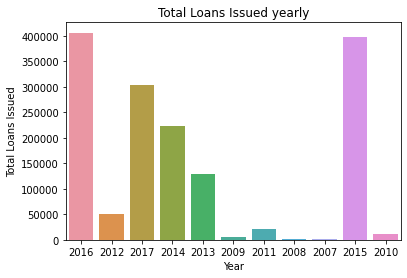

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data = z, x = 'year',y='count')
plt.xlabel('Year')
plt.ylabel('Total Loans Issued')
plt.title("Total Loans Issued yearly")
display()

# Observations: Issuance of loans were very low till 2012.
# From 2013 the loans issuance are high 

In [56]:
# Reference: https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/
# Reference: https://stackoverflow.com/questions/34514545/spark-dataframe-groupby-and-sort-in-the-descending-order-pyspark
# Total Loan Amount across each State
a=df_sel.groupBy("addr_state").sum("loan_amnt").sort(desc("sum(loan_amnt)")).show()

+----------+--------------+
|addr_state|sum(loan_amnt)|
+----------+--------------+
|        CA|    3291080025|
|        TX|    2018707775|
|        NY|    1901631025|
|        FL|    1516821200|
|        IL|     968708150|
|        NJ|     912728475|
|        PA|     789485625|
|        GA|     765957850|
|        OH|     741183200|
|        VA|     715008650|
|        NC|     629187050|
|        MD|     584619275|
|        MA|     571337850|
|        MI|     566298575|
|        AZ|     517167000|
|        WA|     493479575|
|        CO|     491436825|
|        MN|     407770900|
|        CT|     374395650|
|        IN|     373529075|
+----------+--------------+
only showing top 20 rows



In [57]:
a=df_sel.groupBy("addr_state").count().sort(desc("count")).show()

+----------+------+
|addr_state| count|
+----------+------+
|        CA|218904|
|        TX|129412|
|        NY|129108|
|        FL|107005|
|        IL| 63087|
|        NJ| 58241|
|        PA| 53902|
|        OH| 51805|
|        GA| 50647|
|        VA| 44797|
|        NC| 42809|
|        MI| 39357|
|        MD| 37200|
|        MA| 36526|
|        AZ| 35809|
|        CO| 32888|
|        WA| 32518|
|        MN| 28211|
|        IN| 25473|
|        MO| 24690|
+----------+------+
only showing top 20 rows



# Observations: California, New York, Texas and Florida has maximum loan amount total as well as maximum number of loans requested

In [58]:
# Creating a new cleaned column of interest rate
df_sel=df_sel.withColumn("int_rate_cleaned",regexp_extract(col("int_rate"),"\\d+",0))

In [59]:
# Overall Average Interest rate across USA
# Refer: https://stackoverflow.com/questions/32550478/pyspark-take-average-of-a-column-after-using-filter-function

df_sel.agg(avg(col("int_rate_cleaned"))).show()

+---------------------+
|avg(int_rate_cleaned)|
+---------------------+
|   12.624228744677024|
+---------------------+



In [60]:
df_sel=df_sel.withColumn("int_rate_cleaned",df_sel["int_rate_cleaned"].cast("double"))

In [61]:
# Refer: https://stackoverflow.com/questions/32550478/pyspark-take-average-of-a-column-after-using-filter-function
# Average interest rate across each US state
df_sel.groupBy("addr_state").avg("int_rate_cleaned").sort(desc("avg(int_rate_cleaned)")).show(50)


+----------+---------------------+
|addr_state|avg(int_rate_cleaned)|
+----------+---------------------+
|        HI|   13.308980015572281|
|        AL|   13.080821481638718|
|        ID|   12.965239294710328|
|        MS|    12.95678553739475|
|        AK|   12.868769883351007|
|        TN|    12.85865947676623|
|        AR|   12.851054442777729|
|        ND|   12.838009049773756|
|        NE|   12.826021180030256|
|        SC|   12.811548017716323|
|        NV|   12.798302382292253|
|        OK|   12.797348081968375|
|        WY|    12.77151248164464|
|        MD|   12.754623655913978|
|        NC|   12.750402952650143|
|        KY|   12.744309764309765|
|        NY|   12.740930074046535|
|        DE|    12.73727837900069|
|        IN|   12.732108507046677|
|        FL|   12.730106069809821|
|        LA|   12.724725274725275|
|        SD|   12.719005663939585|
|        GA|   12.711236598416491|
|        UT|   12.709438968915846|
|        WA|   12.704809643889538|
|        NM|   12.70

# Observations: California (12.52 %), New York(12.74 %) , Florida (12.73 %) and Texas(12.55%) have maximum loans issued as they are close to overall average interest rate of all US states(12.62%) .

In [62]:
# reference: https://medium.com/analytics-vidhya/spark-group-by-and-filter-deep-dive-5326088dec80
# Checking bad loans across state
import pyspark.sql.functions as f
df_sel.groupBy("addr_state","bad_loan").count().filter(f.col("bad_loan")=="Yes").sort(desc("count")).show()

+----------+--------+-----+
|addr_state|bad_loan|count|
+----------+--------+-----+
|        CA|     Yes|18091|
|        NY|     Yes|11258|
|        TX|     Yes| 9594|
|        FL|     Yes| 9084|
|        NJ|     Yes| 4740|
|        IL|     Yes| 4238|
|        PA|     Yes| 4172|
|        OH|     Yes| 3969|
|        VA|     Yes| 3664|
|        GA|     Yes| 3652|
|        NC|     Yes| 3529|
|        MD|     Yes| 3116|
|        MI|     Yes| 2983|
|        AZ|     Yes| 2804|
|        MA|     Yes| 2788|
|        WA|     Yes| 2231|
|        MN|     Yes| 2171|
|        CO|     Yes| 2161|
|        NV|     Yes| 1988|
|        IN|     Yes| 1879|
+----------+--------+-----+
only showing top 20 rows



# Observations: California, Florida, New York and Texas have most number of bad loan requested. As they have most number of loan requested overall.</b></br>


In [63]:
# Annual Income
df_sel.agg(avg(col("annual_inc"))).show()

+----------------+
| avg(annual_inc)|
+----------------+
|77829.5121889684|
+----------------+



# Observations: Average Annual Income across all USA is 67K

In [64]:
# Average interest rate across each US state
df_sel.groupBy("addr_state").avg("annual_inc").sort(desc("avg(annual_inc)")).show(35)

+----------+-----------------+
|addr_state|  avg(annual_inc)|
+----------+-----------------+
|        DC|92922.29001019368|
|        NJ|87704.12594652257|
|        CT|86289.07528215305|
|        MD|85724.85860622242|
|        VA|84657.09705098676|
|        CA|82987.83547877775|
|        TX| 82681.8982481213|
|        MA|82388.56125744835|
|        NY|80724.40423370425|
|        NH|79739.00157625115|
|        AK| 79580.0320754717|
|        IL|79542.37658069817|
|        GA|78070.45381325445|
|        WA|77245.90957513082|
|        DE|77110.28116279069|
|        LA|76551.96652952296|
|        CO|76367.00055437494|
|        ND|75021.57433056325|
|        AZ|74684.57788475152|
|        UT|74553.09128391984|
|        NC|74199.60741615493|
|        WY|74021.46279276608|
|        SC|73804.74773050421|
|        RI|73800.24663939216|
|        PA|73684.17387059222|
|        NV|  73457.105833175|
|        FL| 73374.5365214264|
|        HI|72918.04666490904|
|        NM|72855.59722394349|
|       

# Observations: California, New York and Texas are all above the average annual income (with the exclusion of Florida), this might give possible indication why most loans are issued in these states

In [65]:
df_sel=df_sel.withColumn("annual_inc",df_sel["annual_inc"].cast("double"))

In [66]:
# Dropping rows with null values 
df_sel=df_sel.na.drop(subset=["annual_inc"])

In [67]:
# Creating groups of Income Category based on Annual Income
df_sel = df_sel.withColumn("Income Category", when((col("annual_inc") >= 0) & (col("annual_inc") <= 100000),"Low Income").when((col("annual_inc") > 100000) & (col("annual_inc") < 200000),"Medium Income").when((col("annual_inc") >= 200000),"High Income").otherwise(df_sel.annual_inc))

In [68]:
df_sel.groupBy("Income Category").count().show()

+---------------+-------+
|Income Category|  count|
+---------------+-------+
|    High Income|  37025|
|     Low Income|1223887|
|  Medium Income| 269037|
+---------------+-------+



# Observations: Most of customers who has taken loan falls into Low Income Category

In [69]:
type(df_sel)

pyspark.sql.dataframe.DataFrame

In [70]:
x=df_sel.select('Income category','bad_loan','loan_amnt')

In [71]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df=x.toPandas()

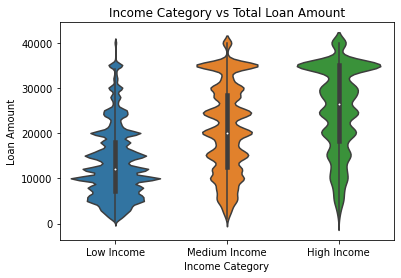

In [72]:
sns.violinplot(data = pd_df, x = 'Income category',y = 'loan_amnt')
plt.xlabel('Income Category')
plt.ylabel('Loan Amount')
plt.title("Income Category vs Total Loan Amount")
display()

# Observations: Customers that made part of the high income category took higher loan amounts than people from low and medium income categories. Of course, people with higher annual incomes are more likely to pay loans with a higher amount

In [73]:
z=df_sel.groupBy("Income Category","bad_loan").count()

In [74]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df=z.toPandas()

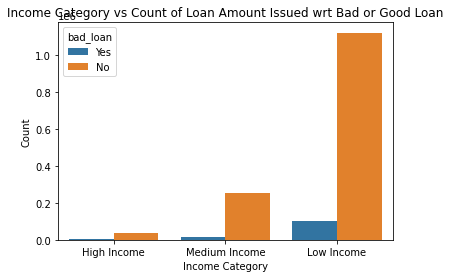

In [75]:
sns.barplot(data =pd_df , x = 'Income Category',y = 'count',hue='bad_loan')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title("Income Category vs Count of Loan Amount Issued wrt Bad or Good Loan")
display()

# Observations: Loans that were borrowed by the Low income category had a slightly higher change of becoming a bad loan

In [76]:
x=df_sel.select('Income category','bad_loan','int_rate_cleaned')

In [77]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df=x.toPandas()

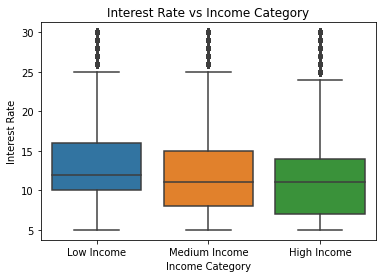

In [78]:
sns.boxplot(data = pd_df, x = 'Income category',y = 'int_rate_cleaned')
plt.xlabel('Income Category')
plt.ylabel('Interest Rate')
plt.title("Interest Rate vs Income Category")
display()

# Observations: Customers with a lower income had on average higher interest rates while people with a higher annual income had lower interest rates on their loans. 

In [79]:
# Loan Amount Vs Grade
d=df_sel.groupBy("grade").sum("loan_amnt")

In [80]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df=d.toPandas()


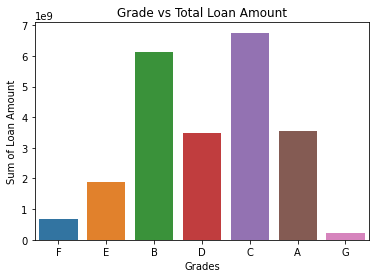

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data = pd_df, x = 'grade',y = 'sum(loan_amnt)')
plt.xlabel('Grades')
plt.ylabel('Sum of Loan Amount')
plt.title("Grade vs Total Loan Amount")
display()

# Observations: Grade C has highest total loan amount

In [82]:
x=df_sel.groupBy("grade","bad_loan").count()

In [83]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df2=x.toPandas()

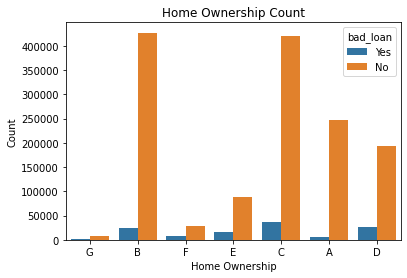

In [84]:
sns.barplot(data = pd_df2, x = 'grade',y='count',hue='bad_loan')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title("Home Ownership Count")
display()

# Observations: Majority of Bad Loans exist from A,B,C and D. 
# Although B and C grade have similar number of Good loans Issued but C grade has more Bad Loans than Grade B

In [85]:
# Home Ownership
d1=df_sel.groupBy("home_ownership").count()

In [86]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df=d1.toPandas()

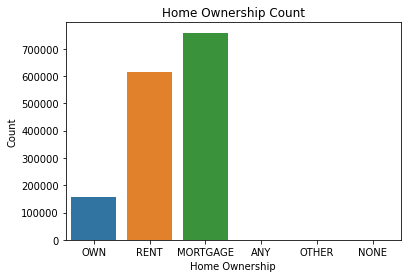

In [87]:
sns.barplot(data = pd_df, x = 'home_ownership',y='count')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title("Home Ownership Count")
display()

# Observations: Most of the loan takers have Home Ownership of Rent or Mortgage. Very Few own a House which request for loan

In [88]:
x=df_sel.select('Income category','bad_loan','loan_amnt')
# Converting spark dataframe to pandas dataframe for plotting
pd_df=x.toPandas()

C:\Users\shwer\AppData\Local\Continuum\anaconda3\envs\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

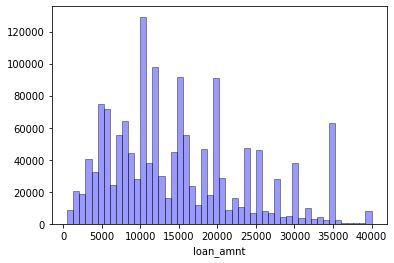

In [89]:
# Reference: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# Loan Amount Distribution
sns.distplot(pd_df['loan_amnt'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})

# Observations: Loan Amount having long right tailed i.e. Skewness is high

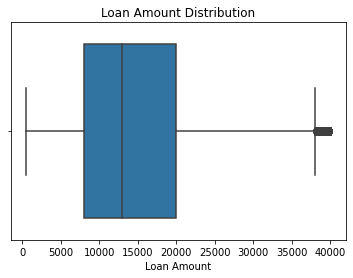

In [90]:
# Boxplot 
sns.boxplot(x=pd_df['loan_amnt'])
plt.xlabel("Loan Amount")
plt.title("Loan Amount Distribution")
plt.show()

# Observations: 25 % percentile of loan amount issued is 7500 , 50% percentile is 12500 and 75 % percentile is 20K.
# There are few outliers i.e. Q3 +1.5(Q3-Q1) which gives maximum point in the dataset. But there are few data points which are lying above that.

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='[bad_loan]'>

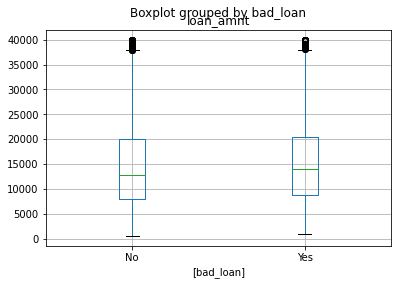

In [91]:
# refer: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
pd_df.boxplot(column=['loan_amnt'], by=['bad_loan'])

# Observations: For Bad Loan the median is 14K while 25 percentile is 9K and 75 percentile is 20K. 


In [92]:
# bad Loan vs term loan taken
x=df_sel.groupBy("term","bad_loan").count()

In [93]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df2=x.toPandas()

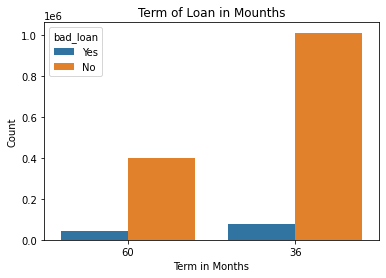

In [94]:
sns.barplot(data = pd_df2, x = 'term',y='count',hue='bad_loan')
plt.xlabel('Term in Months')
plt.ylabel('Count')
plt.title("Term of Loan in Mounths")
display()

In [95]:
x.show()

+----+--------+-------+
|term|bad_loan|  count|
+----+--------+-------+
|  60|     Yes|  42052|
|  36|      No|1012242|
|  60|      No| 398345|
|  36|     Yes|  77310|
+----+--------+-------+



# Observations: Loan taken majority of the times are 36 months.
# 7% of the total loans for term 36 months are bad
# 9.5% of the total loans for term 60 months are bad.
# So, term of 60 months have high probability of being bad loan

In [96]:
# bad Loan vs Employee length
x=df_sel.groupBy("emp_length","bad_loan").count()

In [97]:
# Converting spark dataframe to pandas dataframe for plotting
pd_df2=x.toPandas()

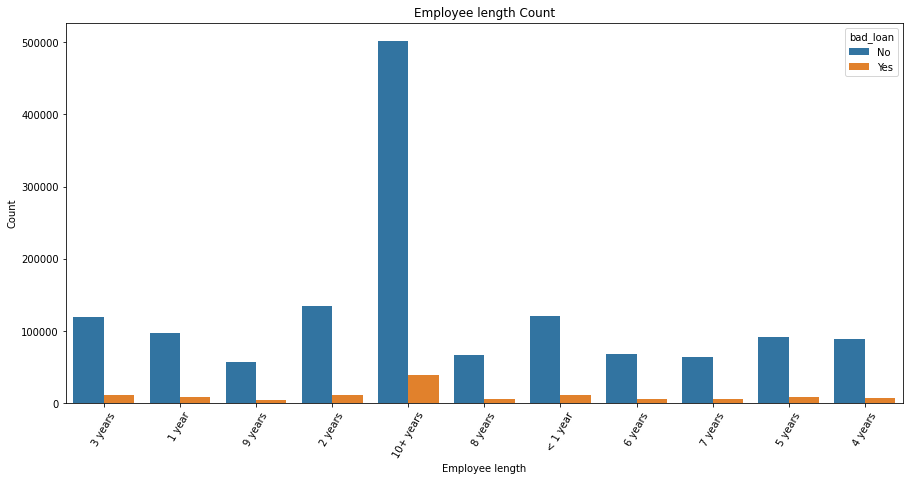

In [98]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 60)
sns.barplot(data = pd_df2, x = 'emp_length',y='count',hue='bad_loan')
plt.xlabel('Employee length')
plt.ylabel('Count')
plt.title("Employee length Count")
display()

# Observations: Majority of Employee are 10+ years who have taken loan.

In [99]:
x=df_sel.select('home_ownership','bad_loan','loan_amnt')
x=x.toPandas()

Text(0.5, 1.0, 'Home Ownership vs Loan Amount')

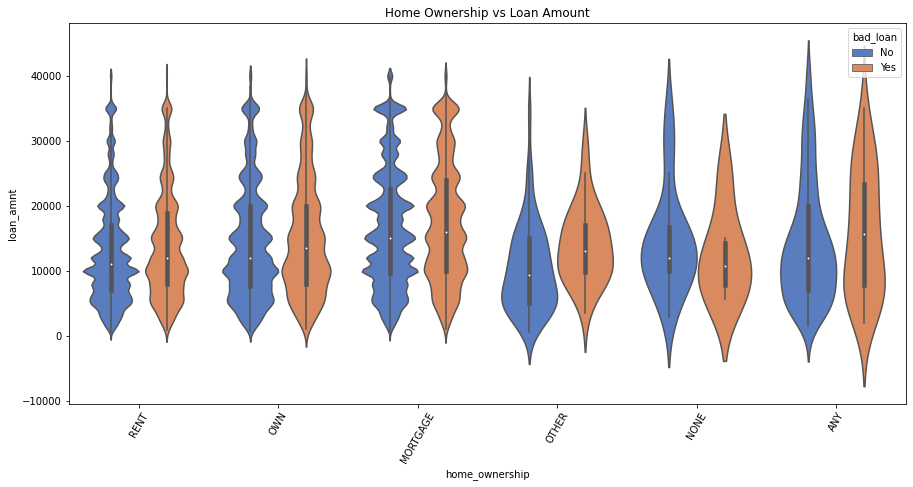

In [100]:
# Home Ownership of Loan Amount
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 60)
sns.violinplot(x="home_ownership", y="loan_amnt", hue="bad_loan",
                    data=x, palette="muted")
plt.title("Home Ownership vs Loan Amount")

# Observations: For Rented Home Ownership good Loan median is 11K while for Bad Loan median it is 12K.
# For Owned House good loan median is 12K while bad one is 14K.
# For Mortgage good loan median is 17K while Bad loan median is 18K.
# So Bad loan median is high than Good loan Amount 
# People who have Mortgage tend to take loans with higher amount.

In [101]:
x=df_sel.select('purpose','loan_status','bad_loan')
x=x.toPandas()

In [102]:
x=x[(x['purpose']=="credit_card")|(x['purpose']=="debt_consolidation") | (x['purpose']=="home_improvement")]

In [103]:
# bad Loan vs Employee length
x.groupby(by=["purpose","bad_loan"]).count()

loan_status
purpose            bad_loan             
credit_card        No             317276
                   Yes             20525
debt_consolidation No             818493
                   Yes             73556
home_improvement   No              92225
                   Yes              6856

Text(0.5, 1.0, 'Loan Purpose Count')

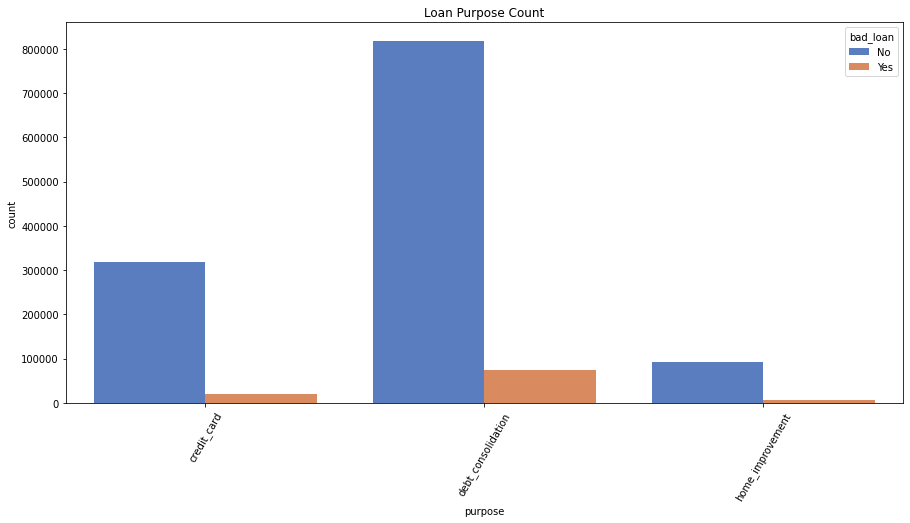

In [104]:
# Loan Purpose Count
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 60)
sns.countplot(x="purpose", hue="bad_loan",
                    data=x, palette="muted")
plt.title("Loan Purpose Count")

# Observations:  6 % of loans taken for credit card are bad.
# 8.2% of loans taken for debt_consolidation are bad
# 7% of loans taken for home improvement are bad.
# Majority of the loans are taken for debt consolidation

In [105]:
df_sel=df_sel.withColumn("dti",df_sel["dti"].cast("double"))


In [106]:
z=df_sel.select("dti","bad_loan","addr_state","emplen_cleaned")

In [107]:
a=z.toPandas()

In [108]:
# bad Loan vs Employee length
x=z.groupBy("addr_state").avg("dti")

In [109]:
x.show()

+----------+------------------+
|addr_state|          avg(dti)|
+----------+------------------+
|        AZ| 18.45996545377319|
|        SC|19.547585584600238|
|        LA|19.446834204381183|
|        MN|  18.8372849818951|
|        NJ|17.139768637532136|
|        DC|15.541371049949031|
|        OR|17.961841100505335|
|        VA|18.579144650679666|
|        RI| 17.65876534190532|
|        KY|19.622849466022725|
|        WY|20.401592054550846|
|        NH|19.056775252856955|
|        MI| 18.80880825943493|
|        NV| 18.57531635949078|
|        WI|19.360464358049686|
|        ID| 21.07852971311475|
|        CA|16.970077552138722|
|        CT|17.387868866013473|
|        NE|20.325924785572898|
|        MT|19.779421101774044|
+----------+------------------+
only showing top 20 rows



In [110]:
z=z.withColumn("emplen_cleaned",z["emplen_cleaned"].cast("double"))

In [111]:
w=z.groupBy("addr_state").avg("emplen_cleaned")

In [112]:
g=z.groupBy("addr_state","bad_loan").count()

In [113]:
g.show()

+----------+--------+-----+
|addr_state|bad_loan|count|
+----------+--------+-----+
|        SC|     Yes| 1167|
|        SD|      No| 2904|
|        RI|     Yes|  493|
|        ND|     Yes|  129|
|        MA|      No|33165|
|        NE|      No| 4223|
|        IL|      No|57898|
|        KS|      No|12448|
|        NC|     Yes| 3496|
|        ME|      No| 2569|
|        ID|     Yes|  144|
|        VT|      No| 3111|
|        WI|     Yes| 1237|
|        PA|     Yes| 4118|
|        MD|      No|33628|
|        IA|     Yes|    1|
|        RI|      No| 6351|
|        MS|     Yes|  555|
|        GA|      No|46430|
|        WA|      No|29896|
+----------+--------+-----+
only showing top 20 rows



In [114]:
g=g.withColumnRenamed("count","Loan_Given_Condition")

In [115]:
h=z.groupBy("addr_state").count()

In [116]:
h.show()

+----------+------+
|addr_state| count|
+----------+------+
|        AZ| 35315|
|        SC| 18286|
|        LA| 17986|
|        MN| 27894|
|        NJ| 57183|
|        DC|  3924|
|        OR| 17811|
|        VA| 44286|
|        RI|  6844|
|        KY| 14702|
|        WY|  3373|
|        NH|  7613|
|        MI| 38792|
|        NV| 21052|
|        WI| 20243|
|        ID|  1952|
|        CA|215340|
|        CT| 24189|
|        NE|  4547|
|        MT|  4284|
+----------+------+
only showing top 20 rows



In [117]:
h=h.withColumnRenamed("count","Loan_Issued")

In [118]:
d=g.join(h,g.addr_state ==  h.addr_state,"inner") 

In [119]:
d.show()

+----------+--------+--------------------+----------+-----------+
|addr_state|bad_loan|Loan_Given_Condition|addr_state|Loan_Issued|
+----------+--------+--------------------+----------+-----------+
|        AZ|      No|               32546|        AZ|      35315|
|        AZ|     Yes|                2769|        AZ|      35315|
|        SC|     Yes|                1167|        SC|      18286|
|        SC|      No|               17119|        SC|      18286|
|        LA|      No|               16430|        LA|      17986|
|        LA|     Yes|                1556|        LA|      17986|
|        MN|     Yes|                2151|        MN|      27894|
|        MN|      No|               25743|        MN|      27894|
|        NJ|      No|               52518|        NJ|      57183|
|        NJ|     Yes|                4665|        NJ|      57183|
|        DC|     Yes|                 200|        DC|       3924|
|        DC|      No|                3724|        DC|       3924|
|        O

In [120]:
df1=d.join(w,"addr_state","inner")

In [121]:
df1.show()

+----------+--------+--------------------+----------+-----------+-------------------+
|addr_state|bad_loan|Loan_Given_Condition|addr_state|Loan_Issued|avg(emplen_cleaned)|
+----------+--------+--------------------+----------+-----------+-------------------+
|        AZ|      No|               32546|        AZ|      35315|  5.801245929491717|
|        AZ|     Yes|                2769|        AZ|      35315|  5.801245929491717|
|        SC|     Yes|                1167|        SC|      18286|  6.171552006999891|
|        SC|      No|               17119|        SC|      18286|  6.171552006999891|
|        LA|      No|               16430|        LA|      17986|  6.092683198042923|
|        LA|     Yes|                1556|        LA|      17986|  6.092683198042923|
|        MN|     Yes|                2151|        MN|      27894|  5.975586147558615|
|        MN|      No|               25743|        MN|      27894|  5.975586147558615|
|        NJ|      No|               52518|        NJ| 

In [122]:
q=df1.withColumn("Percentage_Loan",col("Loan_Given_Condition")/col("Loan_Issued"))

In [123]:
w=z.groupBy("addr_state").avg("dti")

In [124]:
df1=q.join(w,"addr_state","inner")

In [125]:
df1.show()

+----------+--------+--------------------+----------+-----------+-------------------+-------------------+------------------+
|addr_state|bad_loan|Loan_Given_Condition|addr_state|Loan_Issued|avg(emplen_cleaned)|    Percentage_Loan|          avg(dti)|
+----------+--------+--------------------+----------+-----------+-------------------+-------------------+------------------+
|        AZ|      No|               32546|        AZ|      35315|  5.801245929491717| 0.9215913917598754| 18.45996545377319|
|        AZ|     Yes|                2769|        AZ|      35315|  5.801245929491717|0.07840860824012459| 18.45996545377319|
|        SC|     Yes|                1167|        SC|      18286|  6.171552006999891|0.06381931532319808|19.547585584600238|
|        SC|      No|               17119|        SC|      18286|  6.171552006999891| 0.9361806846768019|19.547585584600238|
|        LA|      No|               16430|        LA|      17986|  6.092683198042923|  0.913488268653397|19.446834204381183|


In [126]:
# Analyzing for bad loans
df1.filter(df1.bad_loan == "Yes").sort(desc("Percentage_Loan")).show(50)

+----------+--------+--------------------+----------+-----------+-------------------+--------------------+------------------+
|addr_state|bad_loan|Loan_Given_Condition|addr_state|Loan_Issued|avg(emplen_cleaned)|     Percentage_Loan|          avg(dti)|
+----------+--------+--------------------+----------+-----------+-------------------+--------------------+------------------+
|        HI|     Yes|                 711|        HI|       7586|  6.606643817558661| 0.09372528341682046|19.458216451357764|
|        NV|     Yes|                1958|        NV|      21052|  6.002042561276839|   0.093007790233707| 18.57531635949078|
|        AL|     Yes|                1684|        AL|      18665|  6.536244307527458| 0.09022234128047148|20.282304312885085|
|        OK|     Yes|                1217|        OK|      13940|  6.054017216642754| 0.08730272596843615|19.988804160688655|
|        NY|     Yes|               11071|        NY|     126981|  6.090958489852812| 0.08718627196194706|16.699913765

# Observations: Hawai, Nevada, Alabama and Oklahoma high most Percentage of Bad Loans and reason can be Debt to Income ratio is also very high for these states

In [127]:
# Analyzing for Good Loan
df1.filter(df1.bad_loan == "No").sort(desc("Percentage_Loan")).show(50)

+----------+--------+--------------------+----------+-----------+-------------------+------------------+------------------+
|addr_state|bad_loan|Loan_Given_Condition|addr_state|Loan_Issued|avg(emplen_cleaned)|   Percentage_Loan|          avg(dti)|
+----------+--------+--------------------+----------+-----------+-------------------+------------------+------------------+
|        ME|      No|                2569|        ME|       2671|  6.217147135904156|0.9618120554099588|20.054455260202165|
|        DC|      No|                3724|        DC|       3924|  4.871304791029561|0.9490316004077471|15.541371049949031|
|        VT|      No|                3111|        VT|       3281|  6.391344102407802|0.9481865284974094|20.286586406583357|
|        NH|      No|                7174|        NH|       7613| 6.2189675554971755|0.9423354787862867|19.056775252856955|
|        ND|      No|                2037|        ND|       2166|  5.131117266851339|0.9404432132963989|20.801869806094178|
|       

# Observations: Maine, District of Columbia and Vermont have maximum percentage of good Loans. 

In [143]:
df_sel=df_sel.withColumn("installment",df_sel["installment"].cast("double"))

In [144]:
s=df_sel.select("purpose","installment","bad_loan")

Text(0.5, 1.0, 'Installments made on Various Purpose for Loan Taken')

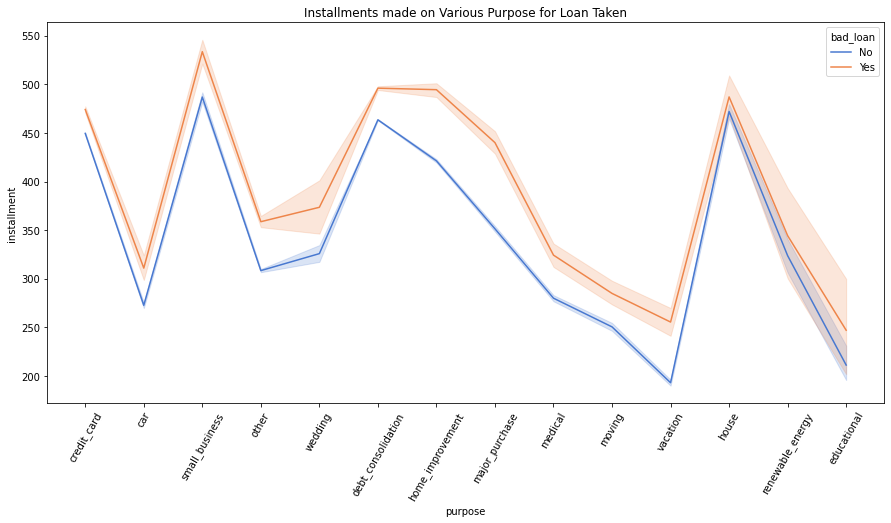

In [145]:
# Converting spark dataframe to pandas dataframe for plotting
z=s.toPandas()
# Installments made on Various Purpose for Loan Taken
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 60)
sns.lineplot(x="purpose", y="installment", hue="bad_loan",
                    data=z, palette="muted")
plt.title("Installments made on Various Purpose for Loan Taken")

# Observations: Generally Installments made for car, Vacation and Eductional are low.
# Installments made for Credit Card, Small Business, Debt Consolidation, Home Improvement and House are high

Text(0.5, 1.0, 'Interset Rate across the years')

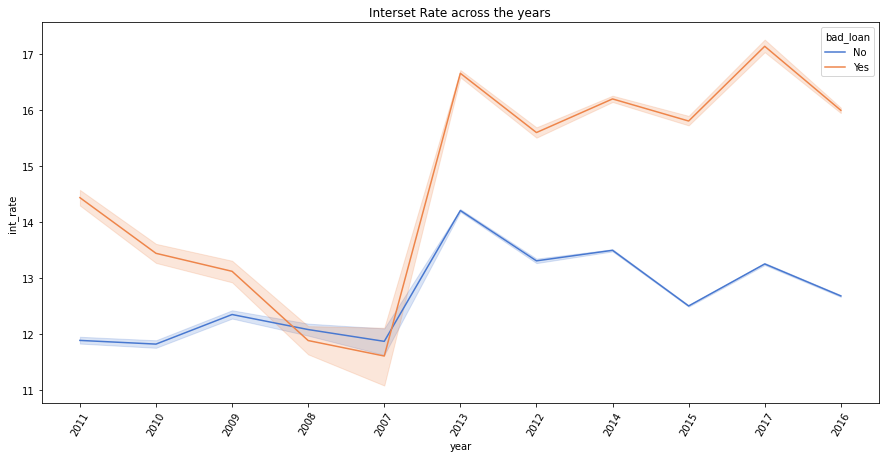

In [141]:
df_sel=df_sel.withColumn("int_rate",df_sel["int_rate"].cast("double"))
# Converting spark dataframe to pandas dataframe for plotting
s=df_sel.select("int_rate","year","bad_loan")
z=s.toPandas()
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 60)
sns.lineplot(x="year", y="int_rate",hue="bad_loan",
                    data=z, palette="muted")
plt.title("Interset Rate across the years")

# Observations: Interest rate for Bad Loans are higher than Good loans making it difficult to repay and resulting into Not Repaying